# Laborator 1 - Analiza exploratorie a datelor (EDA)
Mihai Trăscău (2023)

Scopul acestui laborator este de a deprinde câteva din tehnicile de explorare a un set de date. Metodele de analiză pe care le veți folosi vă ajută spre a descoperi particularități și probleme ale setului de date, cum ar fi:
* Înțelegerea compoziției setului de date (atribute, valori și exemple)
* Realizarea unor statistici (simple) la nivelul setului de date
* Descoperirea și tratarea datelor eronate sau lipsă
* Vizualizarea datelor (pentru o mai bună înțelegere)
* Calculul corelațiilor între atribute

Toate acestea vă ajută să vă asigurați că veți avea un set de date utilizabil și să puteți lua o decizie cât mai informată referitoare la modelele de învățare pe care le veți utiliza.

## Bibliotecile Numpy și Pandas
Cele mai populare biblioteci (oferite sub formă de pachete) din Python pentru a realiza astfel de analize sunt [Numpy](https://numpy.org/doc/stable/) și [Pandas](https://pandas.pydata.org/docs/reference/index.html). Numpy servește ca model de bază pentru matricele multidimensionale cu care veți lucra, în timp ce Pandas pune la dispoziție o suită întreagă de metode de analiză și vizualizare a datelor. Majoritatea funcțiilor pe care le veți utiliza în acest laborator sunt din biblioteca _pandas_. Suplimentar, veți folosi și funcții de vizualizare (mai avansate) din biblioteca Matplotlib sau din [Seaborn](https://seaborn.pydata.org/tutorial/introduction) (strâns legată de _pandas_).

## Setul de date
Veți lucra cu setul de date [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+disease) din colecția UCI. Acesta conține informații despre pacienți care suferă (sau nu) de boli de inimă. Atributele din setul de date sunt, în ordine:
1. _age_ - vârstă
2. _sex_ - sexul biologic al pacientului (1 pentru bărbat și 0 pentru femeie)
3. _cp_  - tipul durerii în piept
4. _trestbps_ - tensiunea arterială la repaos (în mm/Hg)
5. _chol_ - colesterol seric (în mg/dl)
6. _fbs_ - glicemie peste 120 md/dl
7. _restecg_ - rezultate electrocardiograma
8. _thalach_ - puls maxim
9. _exang_ - dureri induse de exerciții (1 pentru da, 0 pentru nu)
10. _oldpeak_ - diferența ECG din testul de stres față de repaos
11. _slope_ - panta ECG în testul de stres
12. _ca_ - numărul de vase majore colorate prin fluoroscopie
13. _thal_ - tip de thalassemie (boală de sânge)
14. _target_ - diagnostic de severitate a îngustării a vaselor de sânge

In [2]:
# Încărcăm pachetele necesare

# Structuri de date și unelte de analiză
import numpy as np
import pandas as pd

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [3]:
# Descărcăm setul de date
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dataset = pd.read_csv(data_link)

---
#### Cerința 1 [0p]
Afisați primele 5 exemple din setul de date pentru a le inspecta
_(HINT: folosiți variabila **dataset** de mai sus și metode din pandas)_.

In [4]:
# TODO 1
dataset.head(5)

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
#### Cerința 2 [0.5p]
Observând problema legată de coloane, rescrieți numele acestora pentru a fi ușor de lucrat cu acestea în continuare. Afișați apoi, din nou, primele 5 exemple.

In [5]:
# TODO 2
mapping = {
    "63.0":   "age",       
    "1.0":    "sex",      
    "1.0.1":  "cp",        
    "145.0":  "trestbps",  
    "233.0":  "chol",      
    "1.0.2":  "fbs",       
    "2.0":    "restecg",   
    "150.0":  "thalach",   
    "0.0":    "exang",     
    "2.3":    "oldpeak",  
    "3.0":    "slope",    
    "0.0.1":  "ca",        
    "6.0":    "thal",      
    "0":      "target"     
}

dataset = dataset.rename(columns=str).rename(columns=mapping)

dataset.head(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


---
#### Cerința 3 [0p]
Găsiți numărul de exemple din setul de date.

In [6]:
# TODO 3
len(dataset.value_counts())

302

---
#### Cerința 4  [0.5p]
Găsiți, pentru fiecare atribut în parte, următoarele metrici de interes:
* numărul de exemple care nu au valori lipsă
* valoarea medie
* deviația standard a valorilor
* valoarea minimă
* valoarea quantilei 25% (valoarea sub care se găsesc 25% din exemple)
* valoarea quantilei 50% (valoarea sub care se găsesc 50% din exemple)
* valoarea quantilei 75% (valoarea sub care se găsesc 75% din exemple)
* valoarea maximă

_(HINT: Este de ajuns să utilizați o singură metodă din pandas)_

In [7]:
# TODO 4
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


---
#### Cerința 5 [0.5p]
Afișați informații legate de tipul de date și numărul de exemple cu valori nenule pentu fiecare atribut în parte.

In [8]:
# TODO 5
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


---
#### Cerința 6 [0.5p]
Verificați pentru fiecare atribut în parte câte exemple au valori nule (NaN).

In [9]:
# TODO 6
null_summary = (
    pd.DataFrame({
        "null_count": dataset.isna().sum(),
        "null_pct": (dataset.isna().mean() * 100).round(2)
    })
    .sort_values("null_count", ascending=False)
)
print(null_summary)

          null_count  null_pct
age                0       0.0
sex                0       0.0
cp                 0       0.0
trestbps           0       0.0
chol               0       0.0
fbs                0       0.0
restecg            0       0.0
thalach            0       0.0
exang              0       0.0
oldpeak            0       0.0
slope              0       0.0
ca                 0       0.0
thal               0       0.0
target             0       0.0


---
#### Cerința 7 [1p]
Descoperiți care atribute conțin și alte simboluri în afară de valori numerice și afișați exemplele în cauză prin concatenarea lor într-un singur _DataFrame_ din _pandas_ (care să NU conțină duplicate).

_(HINT: Dacă ați rezolvat Cerința 5 vedeți ușor care sunt atributele căutate)._

In [10]:
# TODO 7
for col, type in dataset.dtypes.items():
    if type != "float64" and type != "int64":
        print(col)

ca
thal


---
#### Cerința 8  [1p]
Tratarea valorilor lipsă sau necunoscute din setul de date este importantă din perspectiva aplicării ulterioare a metodelor de învățare. Astfel, înlocuiți simbolurile non-numerice descoperite la pasul trecut cu valoarea cea mai frecventă pentru atributul respectiv.

In [11]:
# TODO 8
def is_float_str(s: str) -> bool:
    try:
        float(s)
        return True
    except (ValueError, TypeError):
        return False

obj_cols = ["ca", "thal"]
most_common = [0.0, 0.0]

for i in range(len(obj_cols)):
    print(dataset[obj_cols[i]].mode())
    print(dataset[obj_cols[i]].mode()[0])
    most_common[i] = dataset[obj_cols[i]].mode()[0]
    print(most_common[i])

for i in range(len(obj_cols)):
    for index, val in dataset[obj_cols[i]].items():
        if is_float_str(str(val)) == False:
            print(dataset.loc[index, obj_cols[i]])
            dataset.loc[index, obj_cols[i]] = most_common[i]
            print(dataset.loc[index, obj_cols[i]])

for i in range(len(obj_cols)):
    dataset[obj_cols[i]] = dataset[obj_cols[i]].astype("float64") 

for i in range(len(obj_cols)):
    print(dataset[obj_cols[i]].mode()) 
        


0    0.0
Name: ca, dtype: object
0.0
0.0
0    3.0
Name: thal, dtype: object
3.0
3.0
?
0.0
?
0.0
?
0.0
?
0.0
?
3.0
?
3.0
0    0.0
Name: ca, dtype: float64
0    3.0
Name: thal, dtype: float64


#### Cerința 9 [0.5p]
Histogramele reprezintă modalități de vizualiza distribuția (frecvența) de valori ale atributelor din setul de date. Atributele  continue sunt discretizate (în „bins”) înainte de a fi afișate.

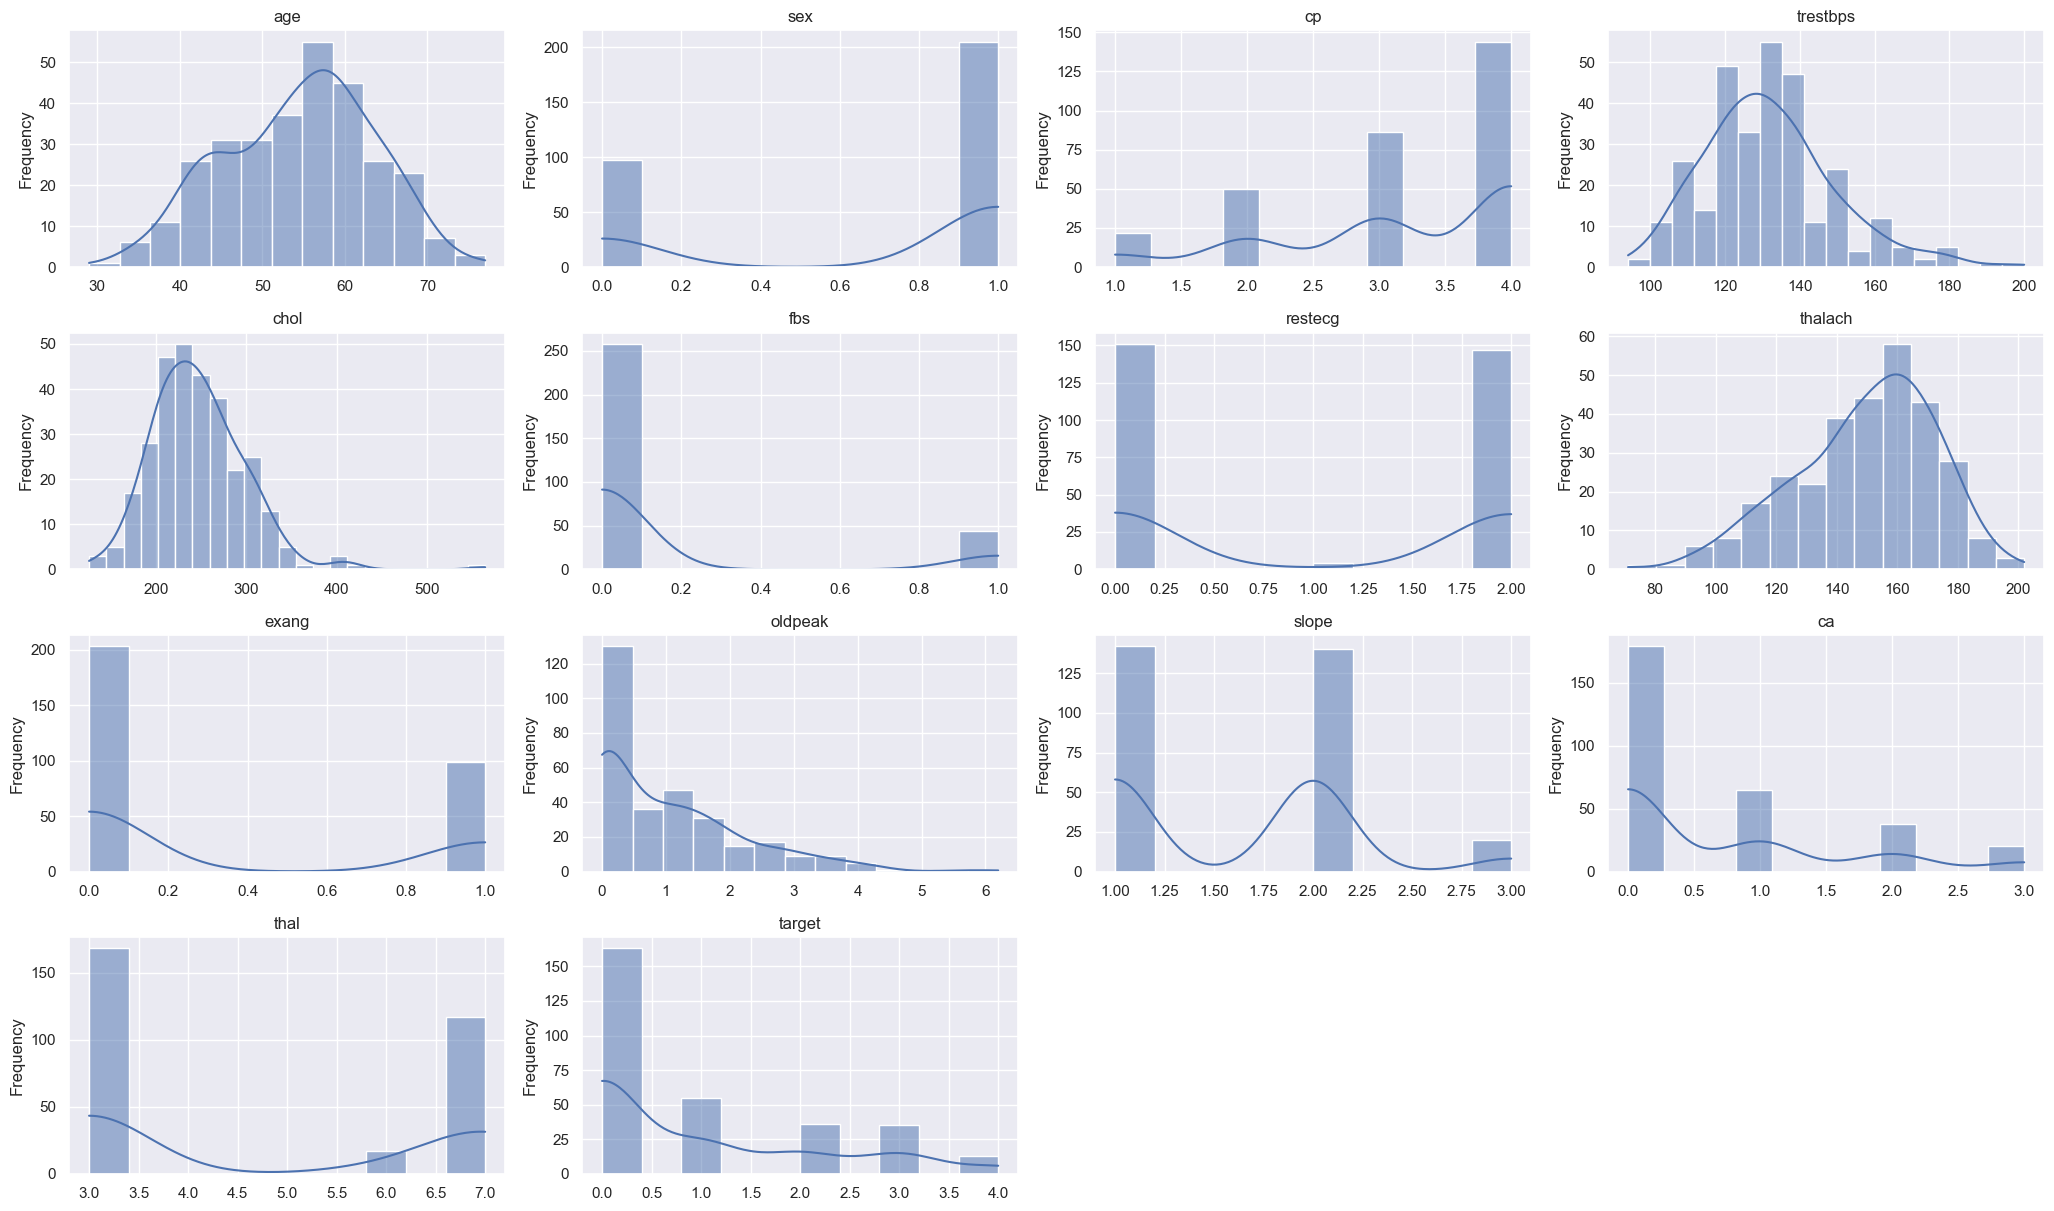

In [12]:
sns.set(rc={'figure.figsize':(20.7,12.27)})
# TODO 9

num_cols = dataset.select_dtypes(include='number').columns.tolist()

n = len(num_cols)
ncols = 4
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(20.7, 12.27))
axes = axes.ravel() if n > 1 else [axes]

for ax, col in zip(axes, num_cols):
    sns.histplot(dataset[col].dropna(), bins='auto', kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

---
#### Cerința 10  [1p]
Plotați histograma atributului _age_ pentru următoarele intervale: 0-18, 18-35, 35-45, 45-55, 55-65 și 65+.

_(HINT: Fixați și parametrul width pentru histogramă pentru afișare mai plăcută)_

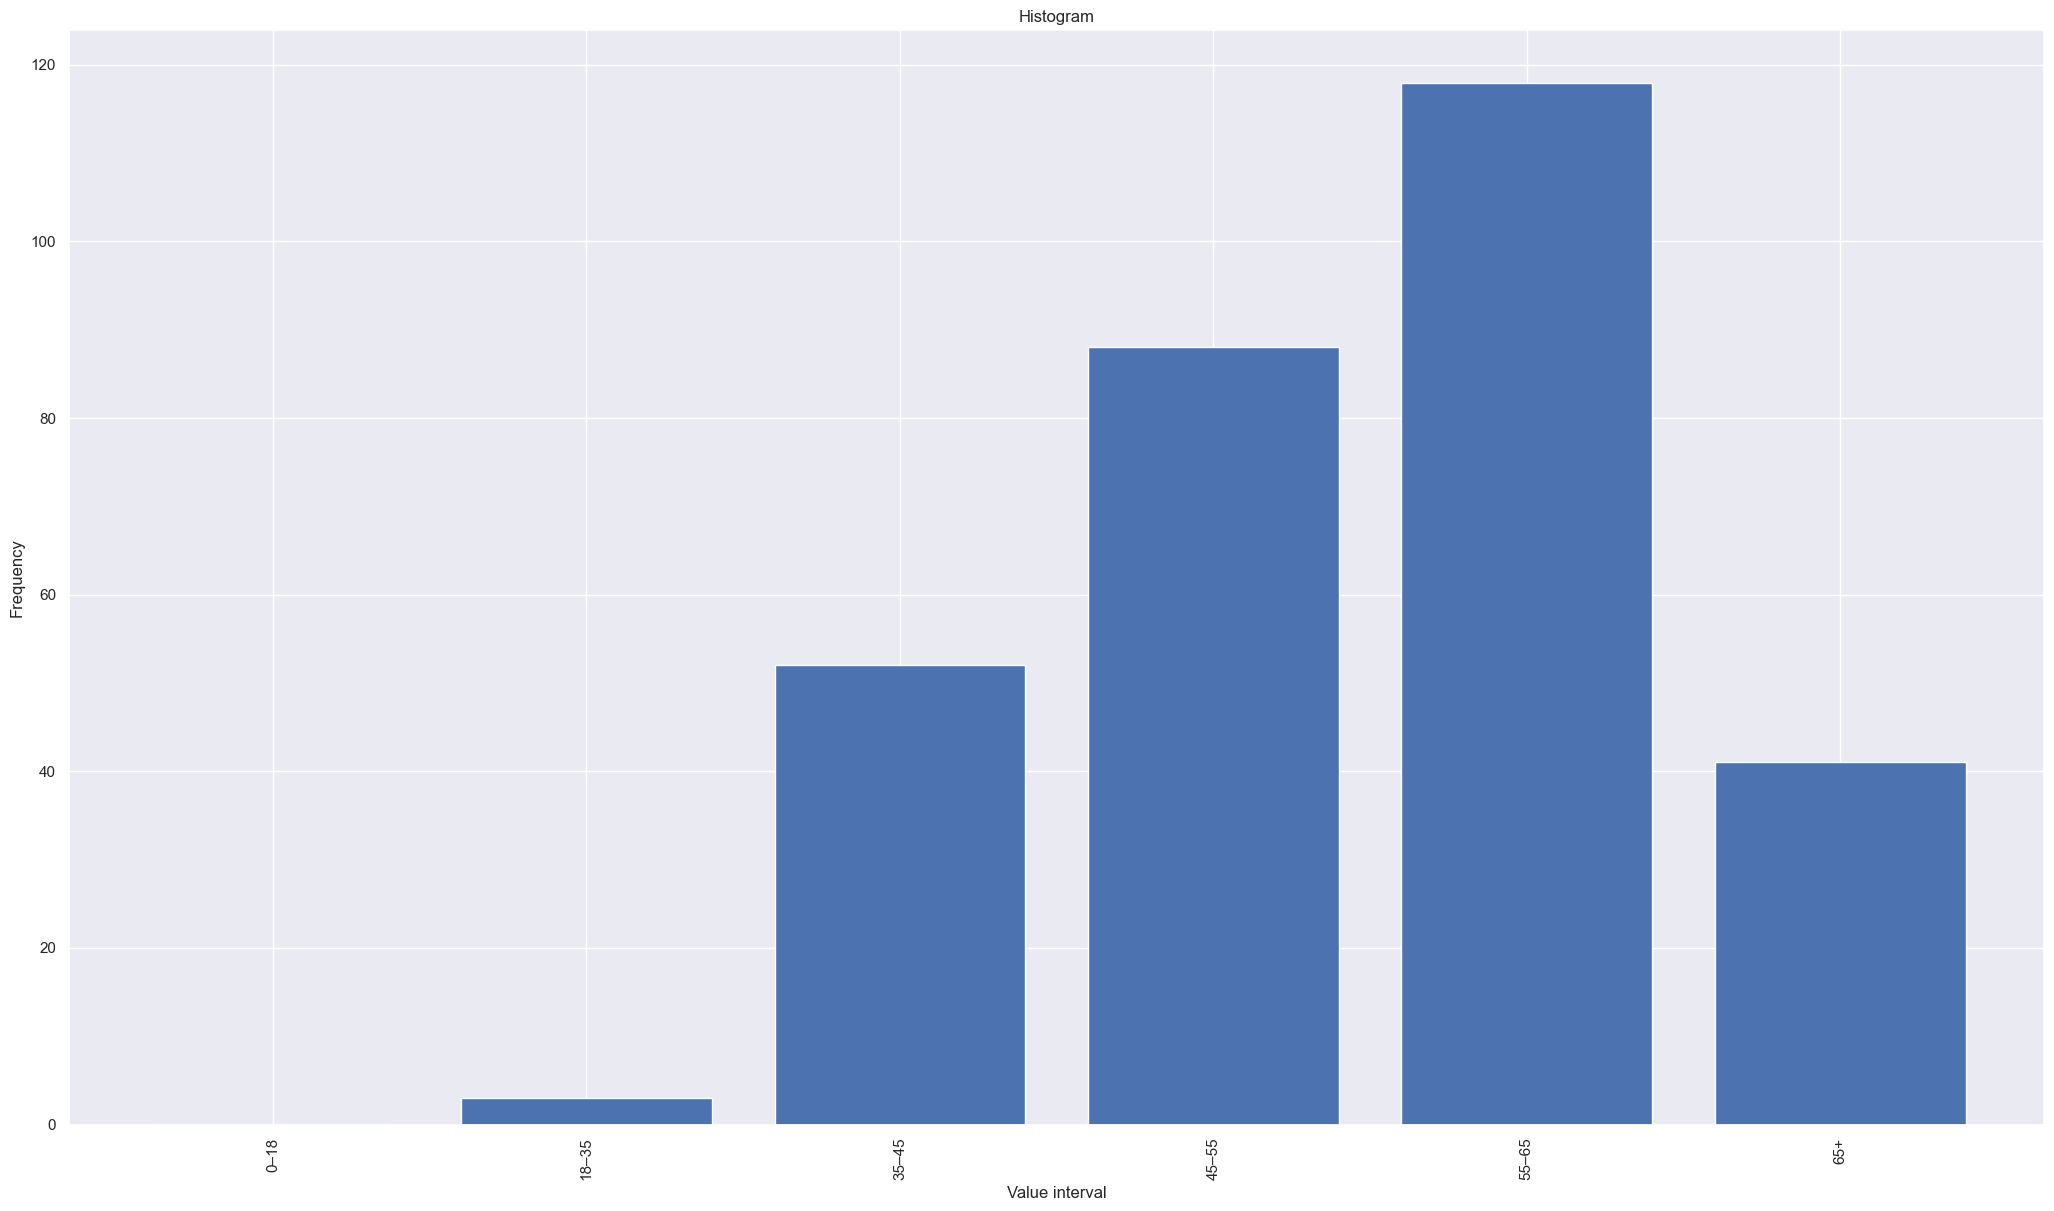

In [13]:
# TODO 10
bins   = [0, 18, 35, 45, 55, 65, np.inf]
labels = ["0–18", "18–35", "35–45", "45–55", "55–65", "65+"]

age_binned = pd.cut(dataset["age"].dropna(), bins=bins, right=False,
                    labels=labels, include_lowest=True)

counts = age_binned.value_counts(sort=False)

ax = counts.plot(kind="bar", width=0.8)
ax.set_xlabel("Value interval")
ax.set_ylabel("Frequency")
ax.set_title("Histogram")
plt.tight_layout()
plt.show()

---
#### Cerința 11  [1p]
Plotați histograma atributului _target_ grupată după sexul pacienților. Păstrați aceeași amplitudine pe axa frecvenței pentru graficele obținute.

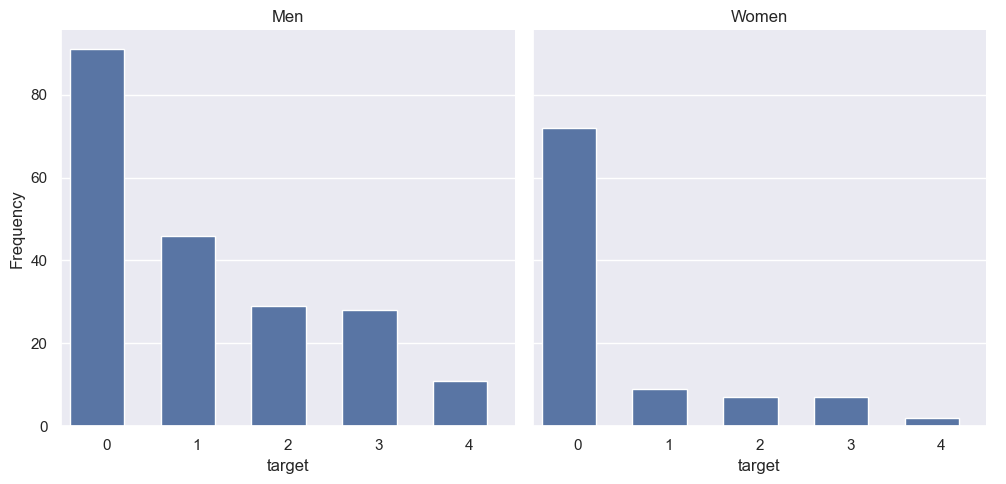

In [14]:
# TODO 11
sex_map = {0: "Women", 1: "Men"}
df = dataset.copy()
df["sex_label"] = df["sex"].map(sex_map).fillna(df["sex"])

order = sorted(pd.unique(df["target"].dropna()))

g = sns.catplot(
    data=df, x="target", kind="count",
    col="sex_label", order=order, sharey=True
)
g.set_axis_labels("target", "Frequency")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    for bar in ax.patches:
        bar.set_width(0.6)
plt.tight_layout()
plt.show()

---
#### Cerința 12  [1p]
Setul nostru de date conține exemple din 5 clase de severitate a diagnosticului, însă pe noi ne interesează doar să cunoaștem dacă diagnosticul este pozitiv sau negativ. Transformați atributul _target_ într-unul binar prin remaparea tuturor valorilor non-zero la valoarea _1_. Afișați apoi histograma pentru atributul astfel modificat.

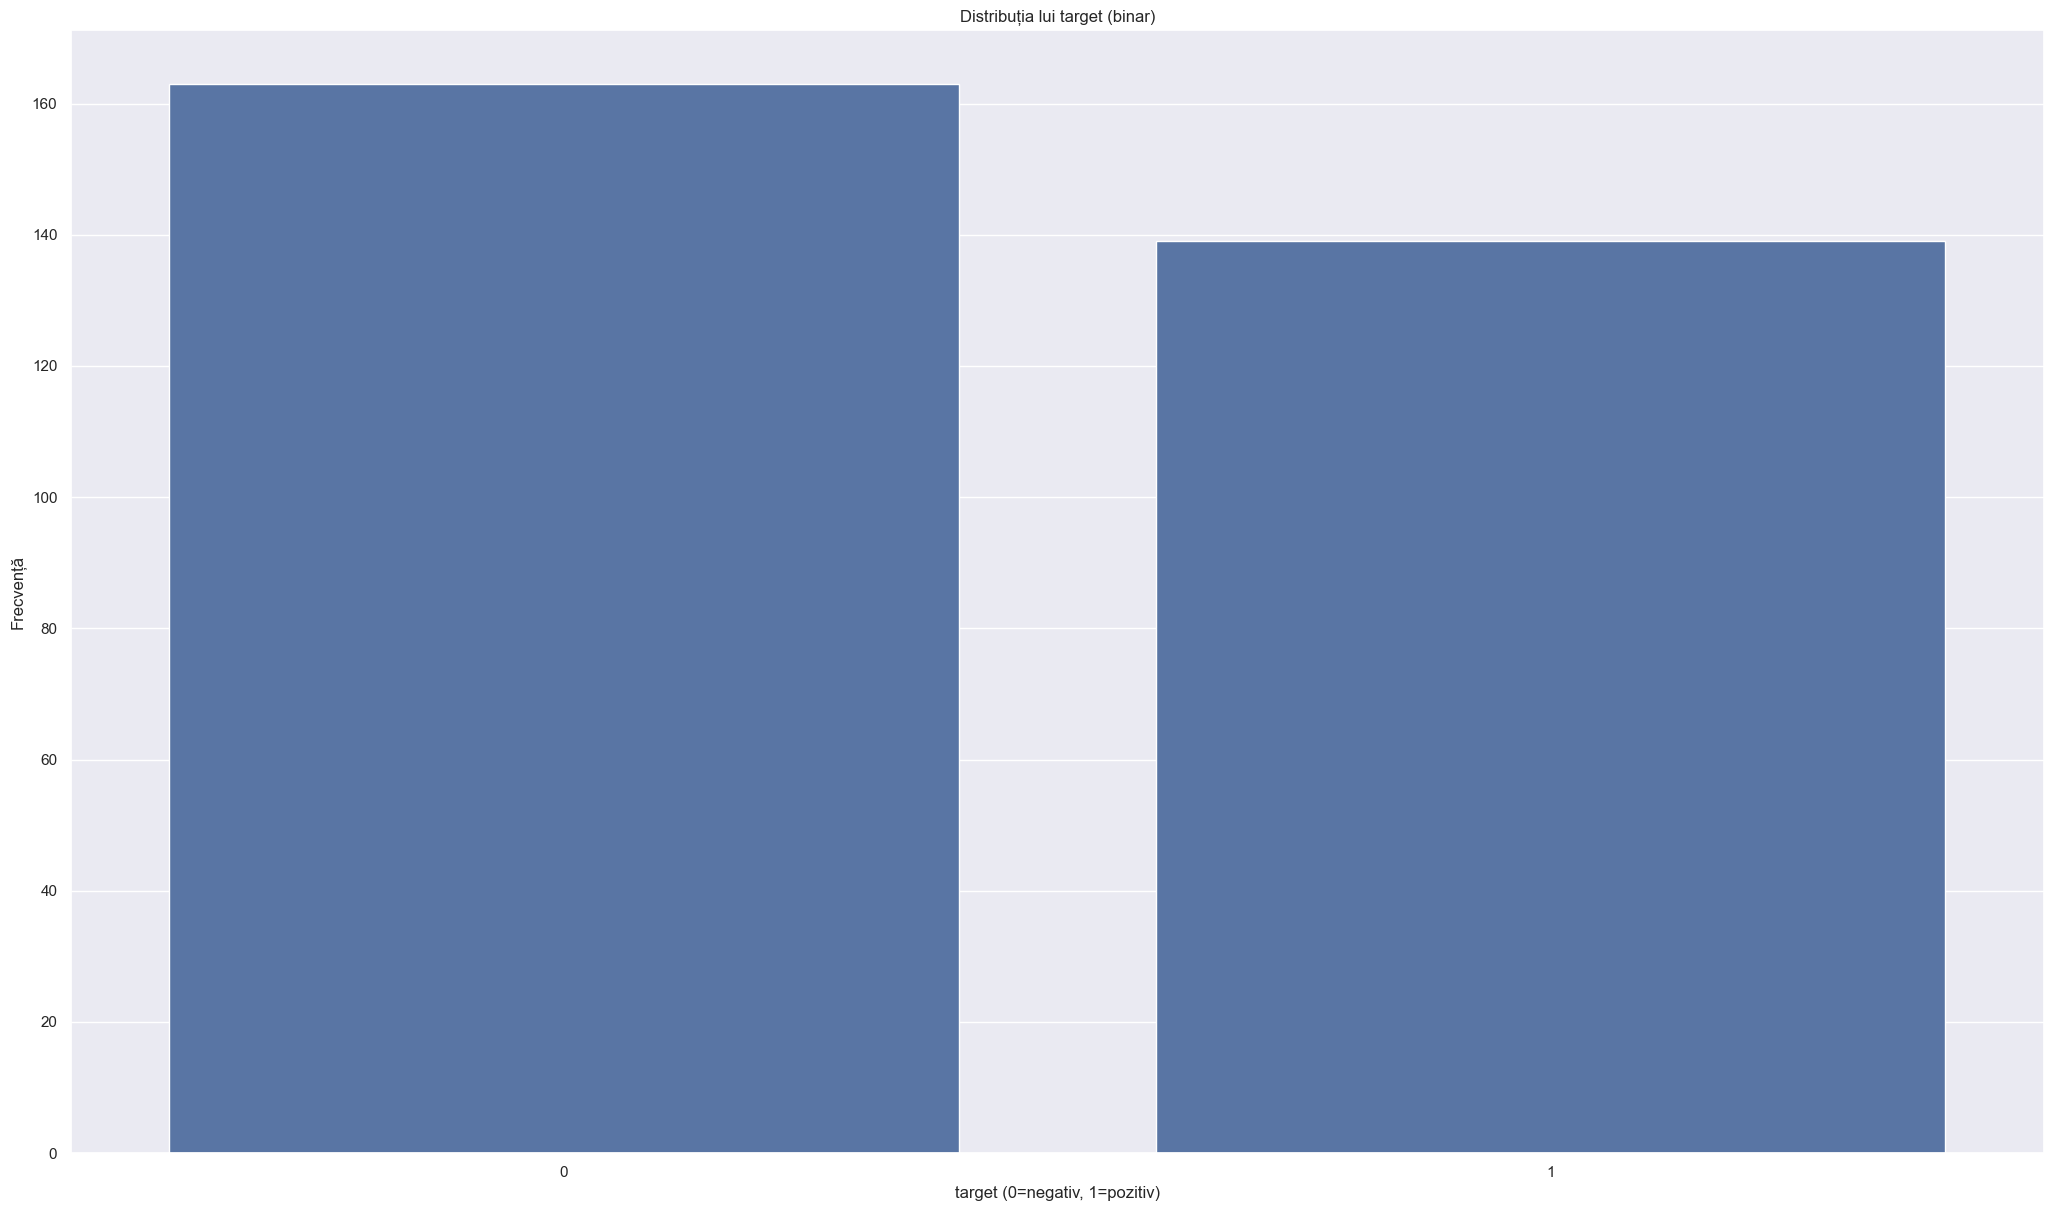

In [15]:
# TODO 12
s = pd.to_numeric(dataset["target"], errors="coerce")

dataset["target"] = s.fillna(0).ne(0).astype(int)

sns.countplot(x=dataset["target"])
plt.xlabel("target (0=negativ, 1=pozitiv)")
plt.ylabel("Frecvență")
plt.title("Distribuția lui target (binar)")
plt.tight_layout()
plt.show()

---
#### Cerința 13 [0.5p]
Corelațiile descriu relații între perechi variabile indicând conform valorilor acestora:
* dacă o variabilă crește, cealaltă crește și ea (valoare de corelație pozitivă, spre 1)
* dacă o variabilă crește, cealaltă scade (valoare de corelație negativă, spre -1)
* cele două variabile nu sunt suficient (sau deloc) corelate (valoare de corelație apropiată de 0)

Calculați folosind metode din _pandas_ valorile acestor corelații (Pearson). Valorile vor fi apoi afișate folosind o hartă cu temperatură (heatmap) folosind _seaborn_.


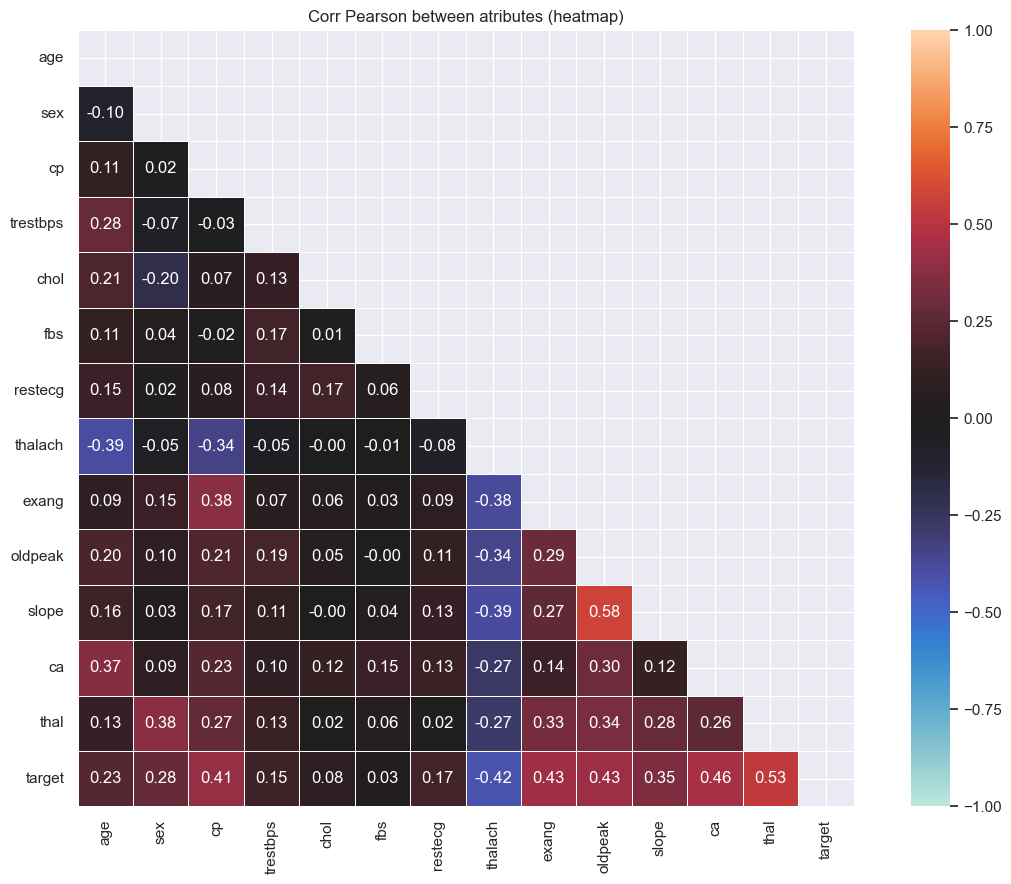

In [16]:
# TODO 13
corr = dataset.select_dtypes(include="number").corr(method="pearson")

plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    vmin=-1, vmax=1, center=0, linewidths=0.5, square=True
)
plt.title("Corr Pearson between atributes (heatmap)")
plt.tight_layout()
plt.show()

#### Cerința 14  [1p]
Extrageți și afișați top-3 atribute puternic corelate cu ținta. Apoi, extrageți și afișați top-3 atribute cele mai puțin corelate cu ținta. Acestea din urmă reprezintă, spre exemplu, candidați buni de atribute ce ar putea fi eliminate dacă am dori un set de date mai „suplu”.

(HINT: Utilizați valoarea absolută a corelației întrucât și corelațiile negative de valori mari absolute sunt considerate „puternice”).

In [20]:
# TODO 14
num_df = dataset.select_dtypes(include="number")
corr_with_target = num_df.corr(method="pearson")["target"].drop(labels="target")

strong_idx = corr_with_target.abs().sort_values(ascending=False).head(3).index
top3_strong = corr_with_target.loc[strong_idx]

weak_idx = corr_with_target.abs().sort_values(ascending=True).head(3).index
top3_weak = corr_with_target.loc[weak_idx]

print("Top-3 strongest corr with target:")
print(top3_strong.to_frame("corr").sort_values("corr", ascending=False))
print("\nTop-3 least strongest corr with target:")
print(top3_weak.to_frame("corr").sort_values("corr", key=lambda s: s.abs()))

Top-3 strongest corr with target:
           corr
thal   0.525184
ca     0.458893
exang  0.430721

Top-3 least strongest corr with target:
              corr
fbs       0.032923
chol      0.084485
trestbps  0.153496


---
#### Cerința 15  [0.5p]
Folosind _seaborn_ plotați un grafic compus care să descrie modul în care fiecare dintre perechile de atribute din setul de date variază una față de cealaltă. Practic, pentru fiecare astfel de pereche pe o axă vom regăsi valorile primului atribut iar pe celalaltă valorile celui de-al doilea.

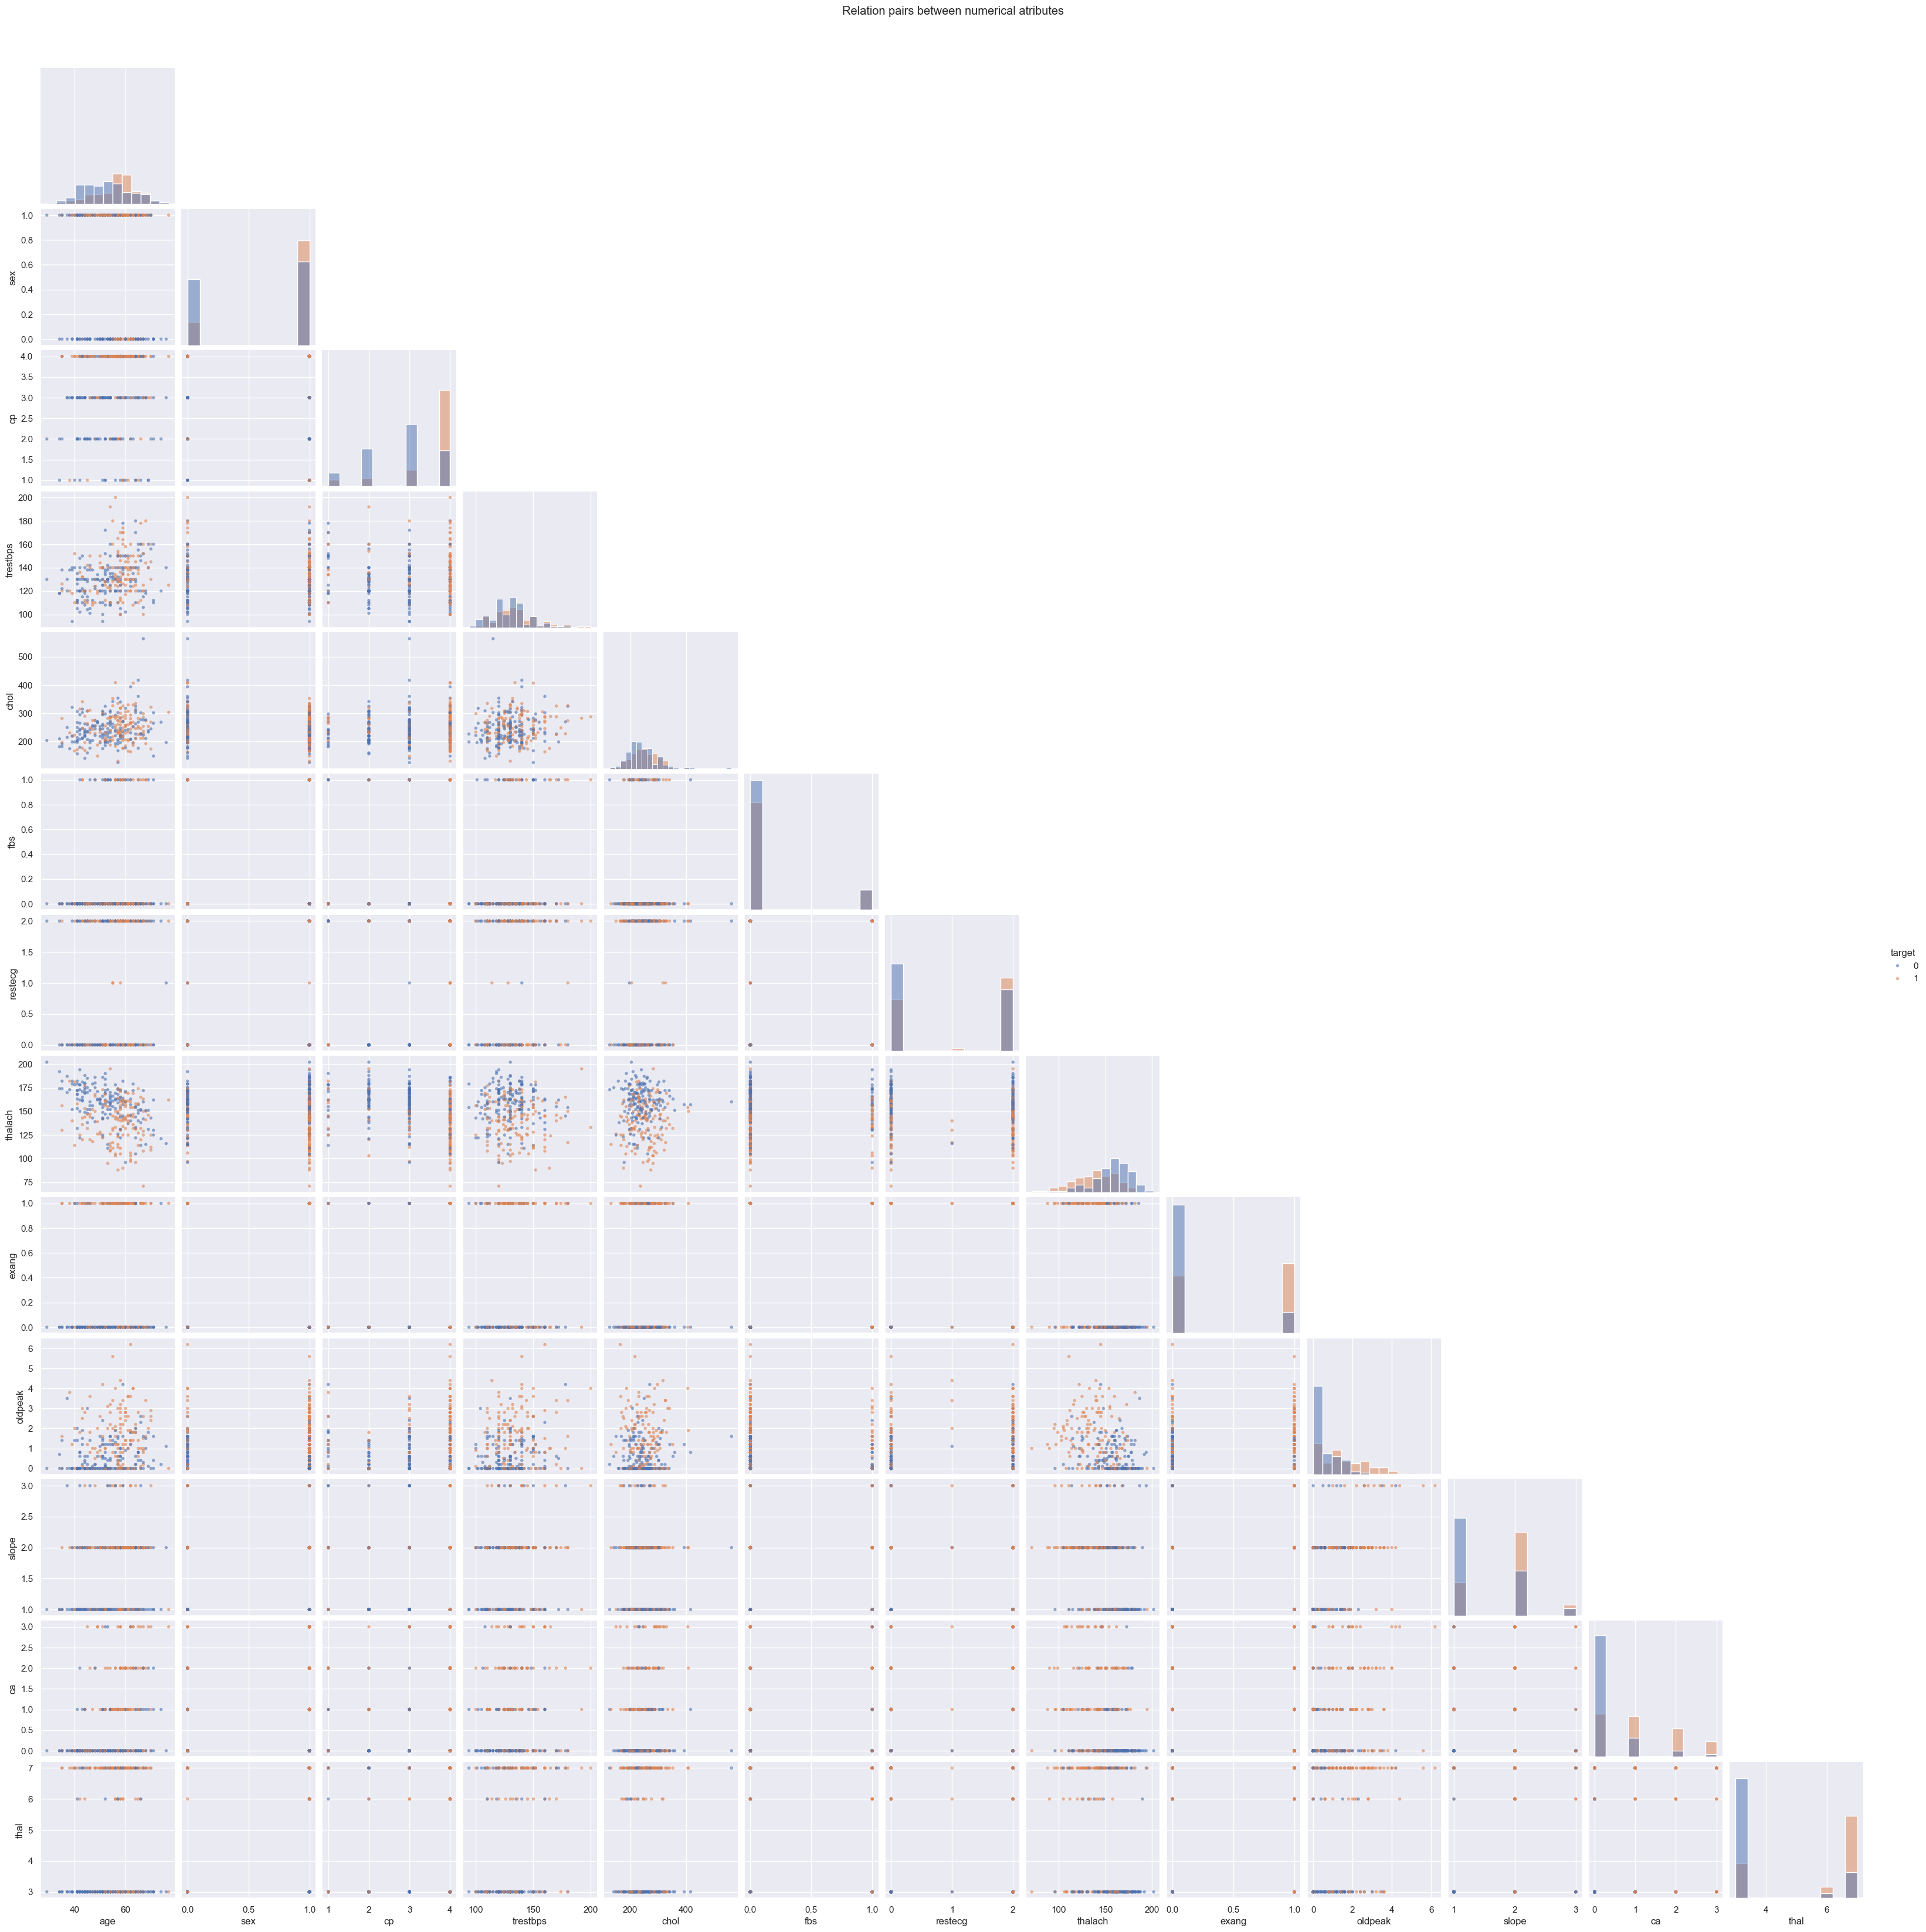

In [21]:
# TODO 15
num_cols = dataset.select_dtypes(include="number").columns.tolist()

hue_col = "target" if "target" in num_cols else None

g = sns.pairplot(
    data=dataset[num_cols],
    hue=hue_col,             
    diag_kind="hist",         
    corner=True,              
    plot_kws=dict(s=15, alpha=0.6, edgecolor="none")
)

g.fig.suptitle("Relation pairs between numerical atributes", y=1.02)
plt.show()

---
#### Cerința 16 [0.5p]
Boxplot este un tip de grafic care ne permite să vizualizăm rapid care sunt valorile pentru medie, minim, maxim, percentilele 25% și 75% precum și valorile _outlier_ (cu o deviație de la medie mai mare de 3 deviații standard).

Realizați un boxplot pentru coloanele _trestbps, chol și thalach_. Explicați pe grafic cum sunt afișate toate valorile descrise mai sus.

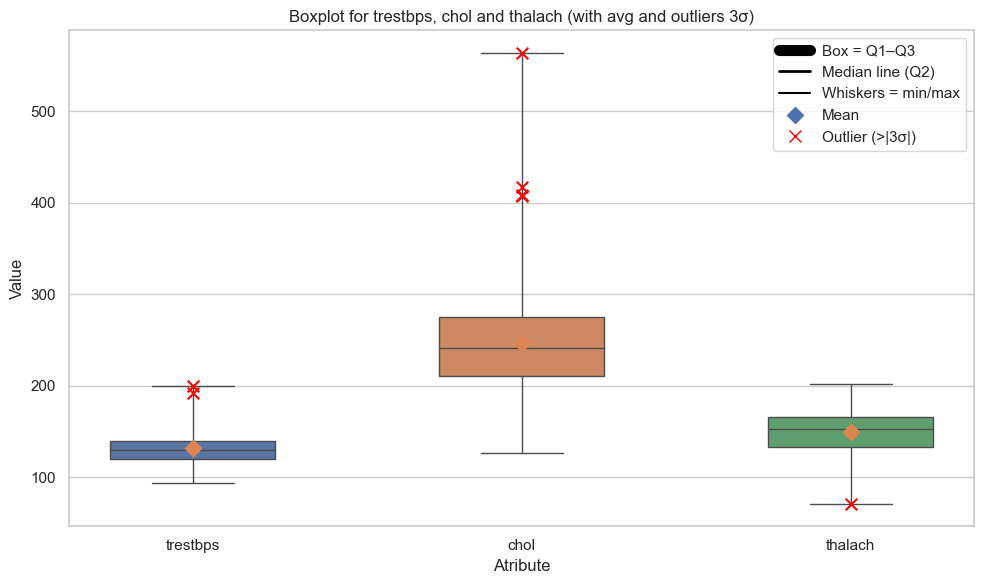

In [23]:
# TODO 16
from matplotlib.lines import Line2D
cols = ["trestbps", "chol", "thalach"]
df = dataset[cols].copy()

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, whis=[0, 100], showfliers=False, width=0.5, ax=ax)

stats = df.agg(['mean', 'std', 'min', 'median', 'max']).T

ax.scatter(range(len(cols)), stats['mean'].values, marker='D', s=70, zorder=3, label='Media')

for i, c in enumerate(cols):
    mu, sd = stats.loc[c, 'mean'], stats.loc[c, 'std']
    out = df[c][(df[c] < mu - 3*sd) | (df[c] > mu + 3*sd)]
    if not out.empty:
        ax.scatter(np.full(out.shape, i), out.values, marker='x', s=70, c='red',
                   zorder=4, label='Outlier (>|3σ|)' if i == 0 else None)

legend_elements = [
    Line2D([0], [0], color='black', lw=8, label='Box = Q1–Q3'),
    Line2D([0], [0], color='black', lw=2, label='Median line (Q2)'),
    Line2D([0], [0], color='black', lw=1.5, label='Whiskers = min/max'),
    Line2D([0], [0], marker='D', linestyle='None', markersize=8, label='Mean'),
    Line2D([0], [0], marker='x', linestyle='None', markersize=8, color='red',
           label='Outlier (>|3σ|)'),
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols)
ax.set_xlabel("Atribute")
ax.set_ylabel("Value")
ax.set_title("Boxplot for trestbps, chol and thalach (with avg and outliers 3σ)")
plt.tight_layout()
plt.show()